<a href="https://colab.research.google.com/github/akm4774/My_Handwritten-Digit-Recognition-with-LeNet5-Model-in-PyTorch/blob/main/NewTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the MLP model with Dropout and BatchNormalization for regularization
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate for better convergence
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Introduce early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
mlp_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Save the model
mlp_model.save('mlp_fashion_model.h5')


Epoch 1/50
 324/1875 [====>.........................] - ETA: 13s - loss: 1.0510 - accuracy: 0.6583

KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the LeNet-5 model with Dropout and BatchNormalization for regularization
lenet_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(120, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(84, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate and early stopping
lenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Introduce early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
lenet_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Save the model
lenet_model.save('lenet_model.h5')


Epoch 1/50
1875/1875 [==============================] - 17s 7ms/step - loss: 0.6165 - accuracy: 0.8075 - val_loss: 0.1050 - val_accuracy: 0.9675
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2328 - accuracy: 0.9311 - val_loss: 0.0718 - val_accuracy: 0.9786
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1807 - accuracy: 0.9479 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1514 - accuracy: 0.9560 - val_loss: 0.0447 - val_accuracy: 0.9866
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1350 - accuracy: 0.9615 - val_loss: 0.0384 - val_accuracy: 0.9874
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1270 - accuracy: 0.9640 - val_loss: 0.0406 - val_accuracy: 0.9872
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1206 - accuracy: 0.9652 - val_loss: 0.0354 - val_ac

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Data augmentation to improve generalization
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Build the CNN model with dropout and batch normalization
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate and early stopping
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Introduce early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data augmentation and early stopping
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=20,
              validation_data=(x_test, y_test), callbacks=[early_stopping])

# Save the model
cnn_model.save('cnn_model.h5')


Epoch 1/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3111 - accuracy: 0.9012 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 2/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1179 - accuracy: 0.9643 - val_loss: 0.0254 - val_accuracy: 0.9905
Epoch 3/20
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0231 - val_accuracy: 0.9920
Epoch 4/20
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0783 - accuracy: 0.9765 - val_loss: 0.0201 - val_accuracy: 0.9928
Epoch 5/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0704 - accuracy: 0.9790 - val_loss: 0.0198 - val_accuracy: 0.9931
Epoch 6/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.0183 - val_accuracy: 0.9940
Epoch 7/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0180 -

Saving 33.jpg to 33.jpg
1/1 [==============================] - 0s 62ms/step


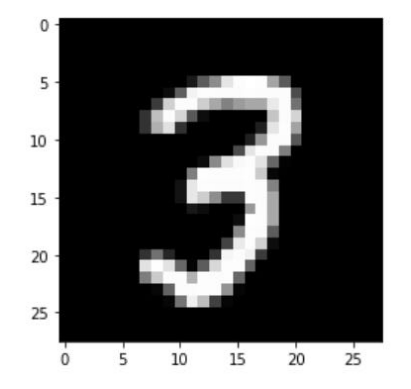

MLP prediction: 7  Probability: 0.98226213
LeNet-5 prediction: 3  Probability: 0.99959487
CNN prediction: 3  Probability: 0.99999547


In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Load the saved models
mlp_model = load_model('mlp_model.h5')
lenet_model = load_model('lenet_model.h5')
cnn_model = load_model('cnn_model.h5')

# Define function to preprocess image
def preprocess_image(img):
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to MNIST standard size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input
    img_array = img_array.astype('float32') / 255.0  # Normalize pixel values
    return img_array

# ... (rest of the code)

def predict_digit():
    uploaded = files.upload()  # Upload image file
    for fn in uploaded.keys():
        # Read uploaded image file
        img = Image.open(io.BytesIO(uploaded[fn]))

        # Preprocess the image
        processed_img = preprocess_image(img)

        # Predict using models and get probabilities
        mlp_probs = mlp_model.predict(processed_img)[0]
        lenet_probs = lenet_model.predict(processed_img)[0]
        cnn_probs = cnn_model.predict(processed_img)[0]

        # Get predicted classes
        mlp_prediction = np.argmax(mlp_probs)
        lenet_prediction = np.argmax(lenet_probs)
        cnn_prediction = np.argmax(cnn_probs)

        # Display the uploaded image
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()

        # Print predictions and probabilities
        print("MLP prediction:", mlp_prediction, " Probability:", mlp_probs[mlp_prediction])
        print("LeNet-5 prediction:", lenet_prediction, " Probability:", lenet_probs[lenet_prediction])
        print("CNN prediction:", cnn_prediction, " Probability:", cnn_probs[cnn_prediction])
predict_digit()

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import load_model
import numpy as np

# Load the MNIST dataset
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255.0

# Reshape data for models that require 4D input (CNN)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Load saved models
mlp_model = load_model('mlp_model.h5')
lenet_model = load_model('lenet_model.h5')
cnn_model = load_model('cnn_model.h5')


In [8]:
# Evaluate MLP model
mlp_loss, mlp_accuracy = mlp_model.evaluate(x_test, y_test, verbose=2)

print(f'MLP Model Accuracy: {mlp_accuracy:.4f}')
# Evaluate LeNet-5 model
lenet_loss, lenet_accuracy = lenet_model.evaluate(x_test, y_test, verbose=2)

print(f'LeNet-5 Model Accuracy: {lenet_accuracy:.4f}')
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)

print(f'CNN Model Accuracy: {cnn_accuracy:.4f}')


313/313 - 1s - loss: 8.3937 - accuracy: 0.0833 - 569ms/epoch - 2ms/step
MLP Model Accuracy: 0.0833
313/313 - 1s - loss: 6.5253 - accuracy: 0.1193 - 648ms/epoch - 2ms/step
LeNet-5 Model Accuracy: 0.1193
313/313 - 1s - loss: 4.8002 - accuracy: 0.1235 - 578ms/epoch - 2ms/step
CNN Model Accuracy: 0.1235
